<a href="https://colab.research.google.com/github/NAMPALLYMANIKANTH/Fight-Data/blob/main/EDA_FLIGHT_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# FEATURES
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:

df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
618,Air Asia,3/05/2019,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,6181


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.shape

(10683, 11)

In [9]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
# Split 'Date_of_Journey' into separate 'Day', 'Month', and 'Year' columns
df['Day']= df["Date_of_Journey"].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df["Date_of_Journey"].str.split('/').str[2]

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [13]:
# Converted 'Day', 'Month', and 'Year' columns from string to integer type

df["Day"] = df['Day'].astype(int)
df['Month']= df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [15]:
df.drop('Date_of_Journey',axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [17]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [18]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]

df['Arrival_Minutes'] = df['Arrival_Time'].str.split(':').str[1]



In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [20]:
df['Arrival_Hour' ]=df['Arrival_Hour'].astype(int)

df['Arrival_Minutes']=df['Arrival_Minutes'].astype(int)

df.drop('Arrival_Time', axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_Minutes  10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [22]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minutes'] = df['Dep_Time'].str.split(':').str[1]
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minutes']=df['Departure_Minutes'].astype(int)
df.drop('Dep_Time', axis = 1, inplace = True)
df.head()



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10683 non-null  object
 5   Total_Stops        10682 non-null  object
 6   Additional_Info    10683 non-null  object
 7   Price              10683 non-null  int64 
 8   Day                10683 non-null  int64 
 9   Month              10683 non-null  int64 
 10  Year               10683 non-null  int64 
 11  Arrival_Hour       10683 non-null  int64 
 12  Arrival_Minutes    10683 non-null  int64 
 13  Departure_Hour     10683 non-null  int64 
 14  Departure_Minutes  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [24]:
df['Total_Stops'].isnull().sum()

np.int64(1)

In [25]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [26]:
df['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
# Map stop labels to numerical values; treat NaN as 1 stop

df['Total_Stops'] = df['Total_Stops'].map({ 'non-stop' : 0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, np.nan:1})

In [29]:
df['Total_Stops'].head()

,Total_Stops
0,0
1,2
2,2
3,1
4,1


In [30]:
df['Total_Stops'].isnull().sum()

np.int64(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10683 non-null  object
 5   Total_Stops        10683 non-null  int64 
 6   Additional_Info    10683 non-null  object
 7   Price              10683 non-null  int64 
 8   Day                10683 non-null  int64 
 9   Month              10683 non-null  int64 
 10  Year               10683 non-null  int64 
 11  Arrival_Hour       10683 non-null  int64 
 12  Arrival_Minutes    10683 non-null  int64 
 13  Departure_Hour     10683 non-null  int64 
 14  Departure_Minutes  10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [32]:
df.drop('Route',axis=1,inplace = True)

In [33]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [34]:
df['Duration_H'] = df['Duration'].str.split(" ").str[0].str.split("h").str[0]
df['Duration_H']

,Duration_H
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [35]:
df['Duration_H'].isnull().sum()


np.int64(0)

In [36]:
df['Duration_H'] = df['Duration_H'].replace({'5m': 0, '10m': 0})
df['Duration_H']

,Duration_H
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [37]:
df['Duration_M'] = df['Duration'].str.split(" ").str[1].str.split("m").str[0]
df['Duration_M']


,Duration_M
0,50
1,25
2,NaN
3,25
4,45
...,...
10678,30
10679,35
10680,NaN
10681,40


In [38]:
df['Duration_M'].isnull().sum()

np.int64(1032)

In [39]:
df['Duration_M'] = df['Duration_M'].fillna(0)
df['Duration_M']

,Duration_M
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [40]:
df['Duration_M'].isnull().sum()
df['Duration_M']

,Duration_M
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Duration           10683 non-null  object
 4   Total_Stops        10683 non-null  int64 
 5   Additional_Info    10683 non-null  object
 6   Price              10683 non-null  int64 
 7   Day                10683 non-null  int64 
 8   Month              10683 non-null  int64 
 9   Year               10683 non-null  int64 
 10  Arrival_Hour       10683 non-null  int64 
 11  Arrival_Minutes    10683 non-null  int64 
 12  Departure_Hour     10683 non-null  int64 
 13  Departure_Minutes  10683 non-null  int64 
 14  Duration_H         10683 non-null  object
 15  Duration_M         10683 non-null  object
dtypes: int64(9), object(7)
memory usage: 1.3

In [42]:
df['Duration_H'] = df['Duration_H'].astype(int)
df['Duration_M'] = df['Duration_M'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Duration           10683 non-null  object
 4   Total_Stops        10683 non-null  int64 
 5   Additional_Info    10683 non-null  object
 6   Price              10683 non-null  int64 
 7   Day                10683 non-null  int64 
 8   Month              10683 non-null  int64 
 9   Year               10683 non-null  int64 
 10  Arrival_Hour       10683 non-null  int64 
 11  Arrival_Minutes    10683 non-null  int64 
 12  Departure_Hour     10683 non-null  int64 
 13  Departure_Minutes  10683 non-null  int64 
 14  Duration_H         10683 non-null  int64 
 15  Duration_M         10683 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.

In [43]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [44]:
df['Duration_Time'] = df['Duration_H']*60 + df["Duration_M"]
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [45]:
df.drop('Additional_Info', axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,21,35,16,50,4,45,285


In [46]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,21,35,16,50,4,45,285


In [47]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [48]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# OneHotEncoding

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()


In [51]:
# One-hot encode 'Airline', 'Source', and 'Destination' columns

encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray()
encoded_array = encoder.fit_transform(df[["Airline", "Source", "Destination"]]).toarray()

In [52]:
pd.DataFrame(encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray(),columns = encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data Visualization

In [53]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,21,35,16,50,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,2019,22,25,19,55,2,30,150
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,2019,23,20,20,45,2,35,155
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,2019,11,20,8,20,3,0,180
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,2019,14,10,11,30,2,40,160


In [54]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,13.348778,24.690630,12.490686,24.411214,10.246092,28.327249,643.092764
std,0.675199,4611.359167,8.479277,1.164357,0.0,6.859125,16.506036,5.748650,18.767980,8.495414,16.946113,507.862591
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,2860.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Duration           10683 non-null  object
 4   Total_Stops        10683 non-null  int64 
 5   Price              10683 non-null  int64 
 6   Day                10683 non-null  int64 
 7   Month              10683 non-null  int64 
 8   Year               10683 non-null  int64 
 9   Arrival_Hour       10683 non-null  int64 
 10  Arrival_Minutes    10683 non-null  int64 
 11  Departure_Hour     10683 non-null  int64 
 12  Departure_Minutes  10683 non-null  int64 
 13  Duration_H         10683 non-null  int64 
 14  Duration_M         10683 non-null  int64 
 15  Duration_Time      10683 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 1.

In [56]:
columns = df.columns
columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minutes',
       'Departure_Hour', 'Departure_Minutes', 'Duration_H', 'Duration_M',
       'Duration_Time'],
      dtype='object')

In [57]:
df_int_columns = df.select_dtypes(include='int')
print(df_int_columns)

       Total_Stops  Price  Day  Month  Year  Arrival_Hour  Arrival_Minutes  \
0                0   3897   24      3  2019             1               10   
1                2   7662    1      5  2019            13               15   
2                2  13882    9      6  2019             4               25   
3                1   6218   12      5  2019            23               30   
4                1  13302    1      3  2019            21               35   
...            ...    ...  ...    ...   ...           ...              ...   
10678            0   4107    9      4  2019            22               25   
10679            0   4145   27      4  2019            23               20   
10680            0   7229   27      4  2019            11               20   
10681            0  12648    1      3  2019            14               10   
10682            2  11753    9      5  2019            19               15   

       Departure_Hour  Departure_Minutes  Duration_H  Duration_

In [58]:
df_corr = df_int_columns.drop('Year', axis= 1)

In [59]:
df_corr.corr()

,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_H,Duration_M,Duration_Time
Total_Stops,1.000000,0.603883,-0.009472,0.054389,0.038123,-0.106939,-0.061490,-0.002591,0.739872,-0.136728,0.738023
Price,0.603883,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.006819,-0.024492,0.508672,-0.124918,0.506369
Day,-0.009472,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,0.002220,-0.008261,-0.022181,-0.008971,-0.022561
Month,0.054389,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.039112,-0.059238,0.016175,-0.040837,0.014872
Arrival_Hour,0.038123,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.005215,0.043054,0.055180,-0.118351,0.051434
Arrival_Minutes,-0.106939,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,0.067909,-0.017594,-0.074439,0.151569,-0.069655
Departure_Hour,-0.061490,0.006819,0.002220,0.039112,0.005215,0.067909,1.000000,-0.024806,0.002783,-0.023761,0.002001
Departure_Minutes,-0.002591,-0.024492,-0.008261,-0.059238,0.043054,-0.017594,-0.024806,1.000000,-0.021946,0.092507,-0.018940
Duration_H,0.739872,0.508672,-0.022181,0.016175,0.055180,-0.074439,0.002783,-0.021946,1.000000,-0.126316,0.999452
Duration_M,-0.136728,-0.124918,-0.008971,-0.040837,-0.118351,0.151569,-0.023761,0.092507,-0.126316,1.000000,-0.093412


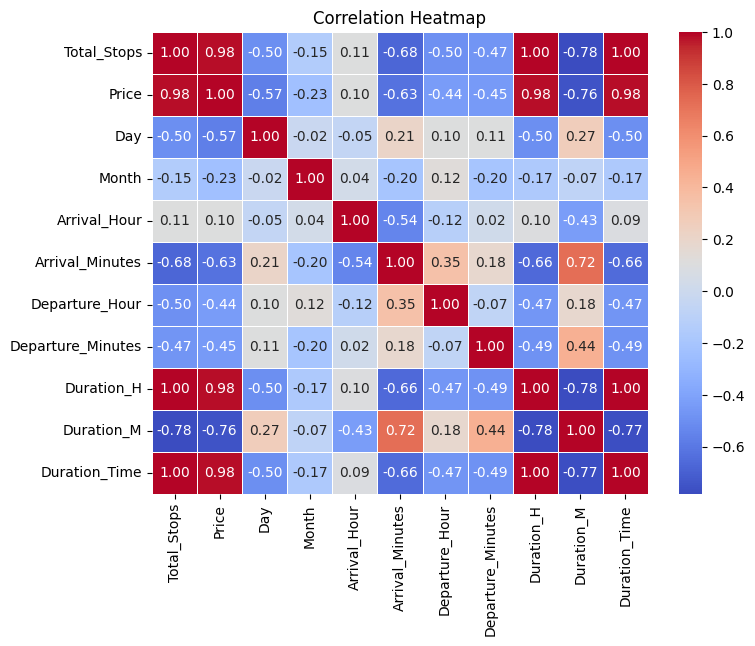

In [65]:
#Heatmap

df_corr = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

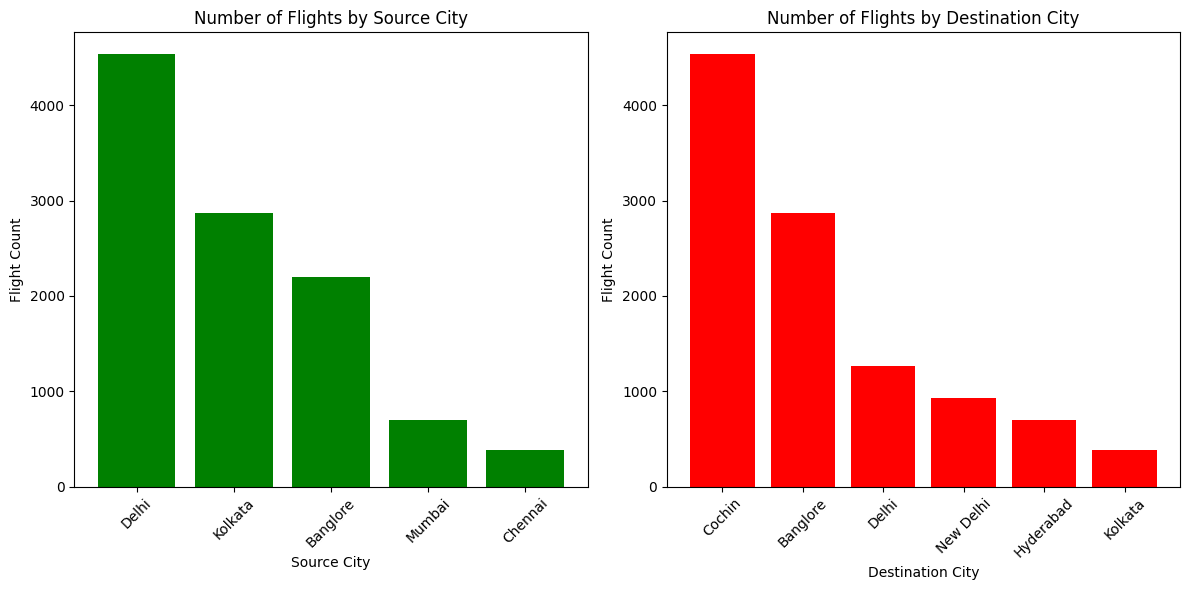

In [84]:
source_counts = df['Source'].value_counts()
destination_counts = df['Destination'].value_counts()

plt.figure(figsize=(12, 6))

# Plot Source
plt.subplot(1, 2, 1)
plt.bar(source_counts.index, source_counts.values, color='Green')
plt.title('Number of Flights by Source City')
plt.xlabel('Source City')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)

# Plot Destination
plt.subplot(1, 2, 2)
plt.bar(destination_counts.index, destination_counts.values, color='Red')
plt.title('Number of Flights by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


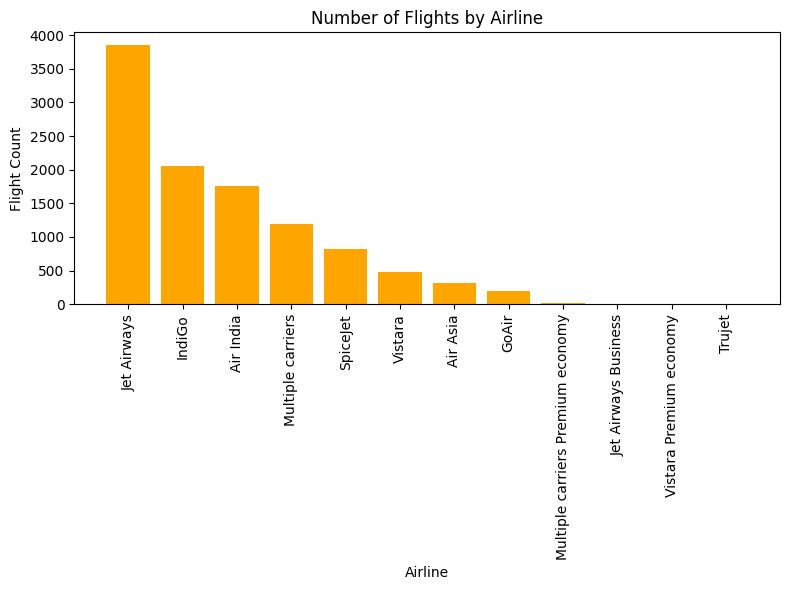

In [94]:
plt.figure(figsize = (8,6))
Airline_counts = df['Airline'].value_counts()
plt.bar(Airline_counts.index, Airline_counts.values, color='Orange')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

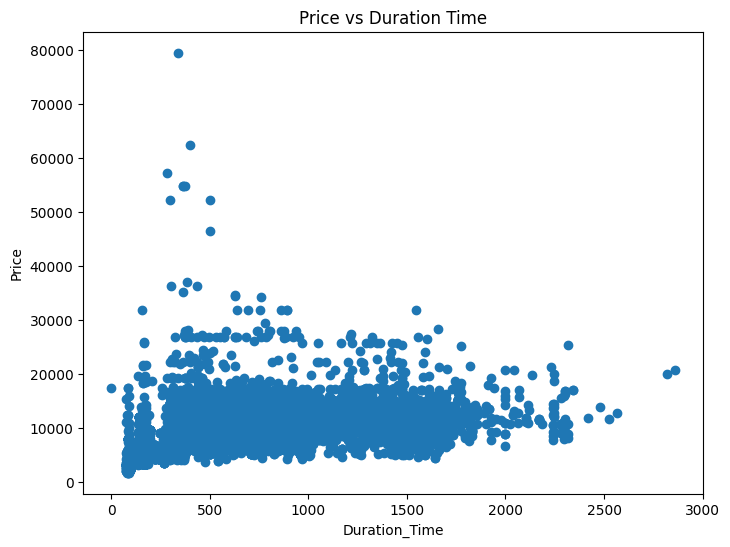

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(df['Duration_Time'], df['Price'])
plt.xlabel('Duration_Time')
plt.ylabel('Price')
plt.title('Price vs Duration Time')
plt.show()

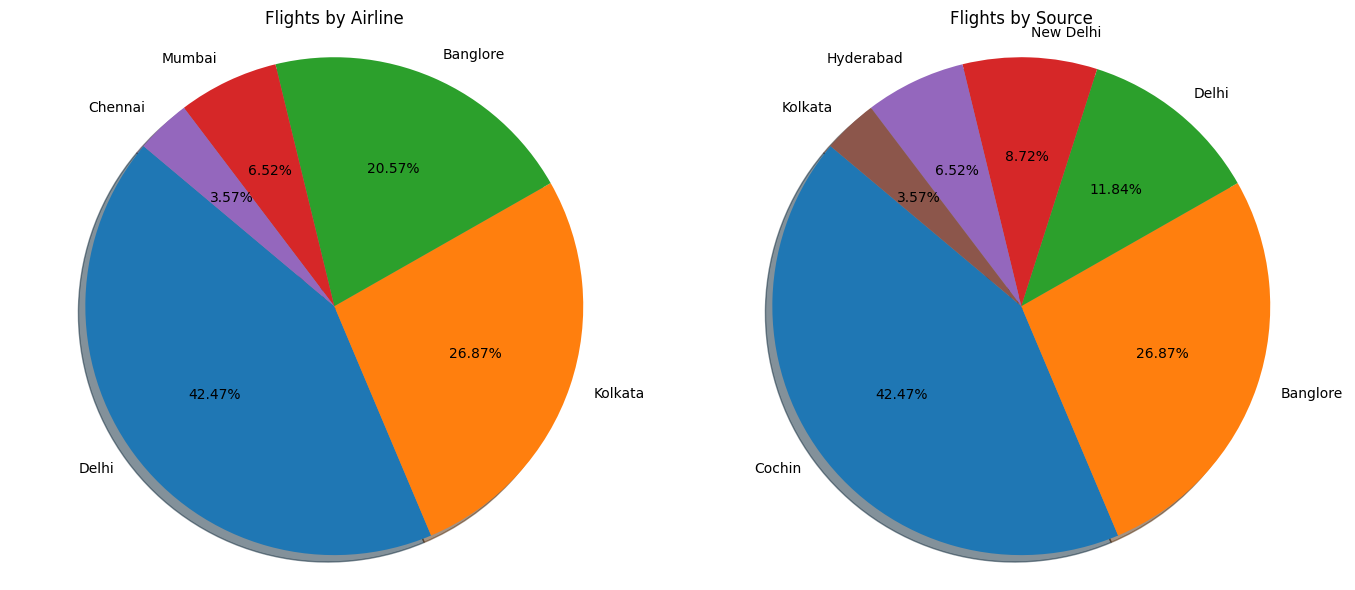

In [80]:
# Prepare data
airline_counts = df['Source'].value_counts()
source_counts = df['Destination'].value_counts()

# Set up the subplot layout: 1 row, 2 columns
plt.figure(figsize=(14, 6))

# First subplot (left)
plt.subplot(1, 2, 1)
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.2f%%', startangle=140, shadow = True)
plt.title('Flights by Airline')
plt.axis('equal')

# Second subplot (right)
plt.subplot(1, 2, 2)
plt.pie(source_counts, labels=source_counts.index, autopct = '%1.2f%%', startangle=140, shadow=True)
plt.title('Flights by Source')
plt.axis('equal')

plt.tight_layout()
plt.show()


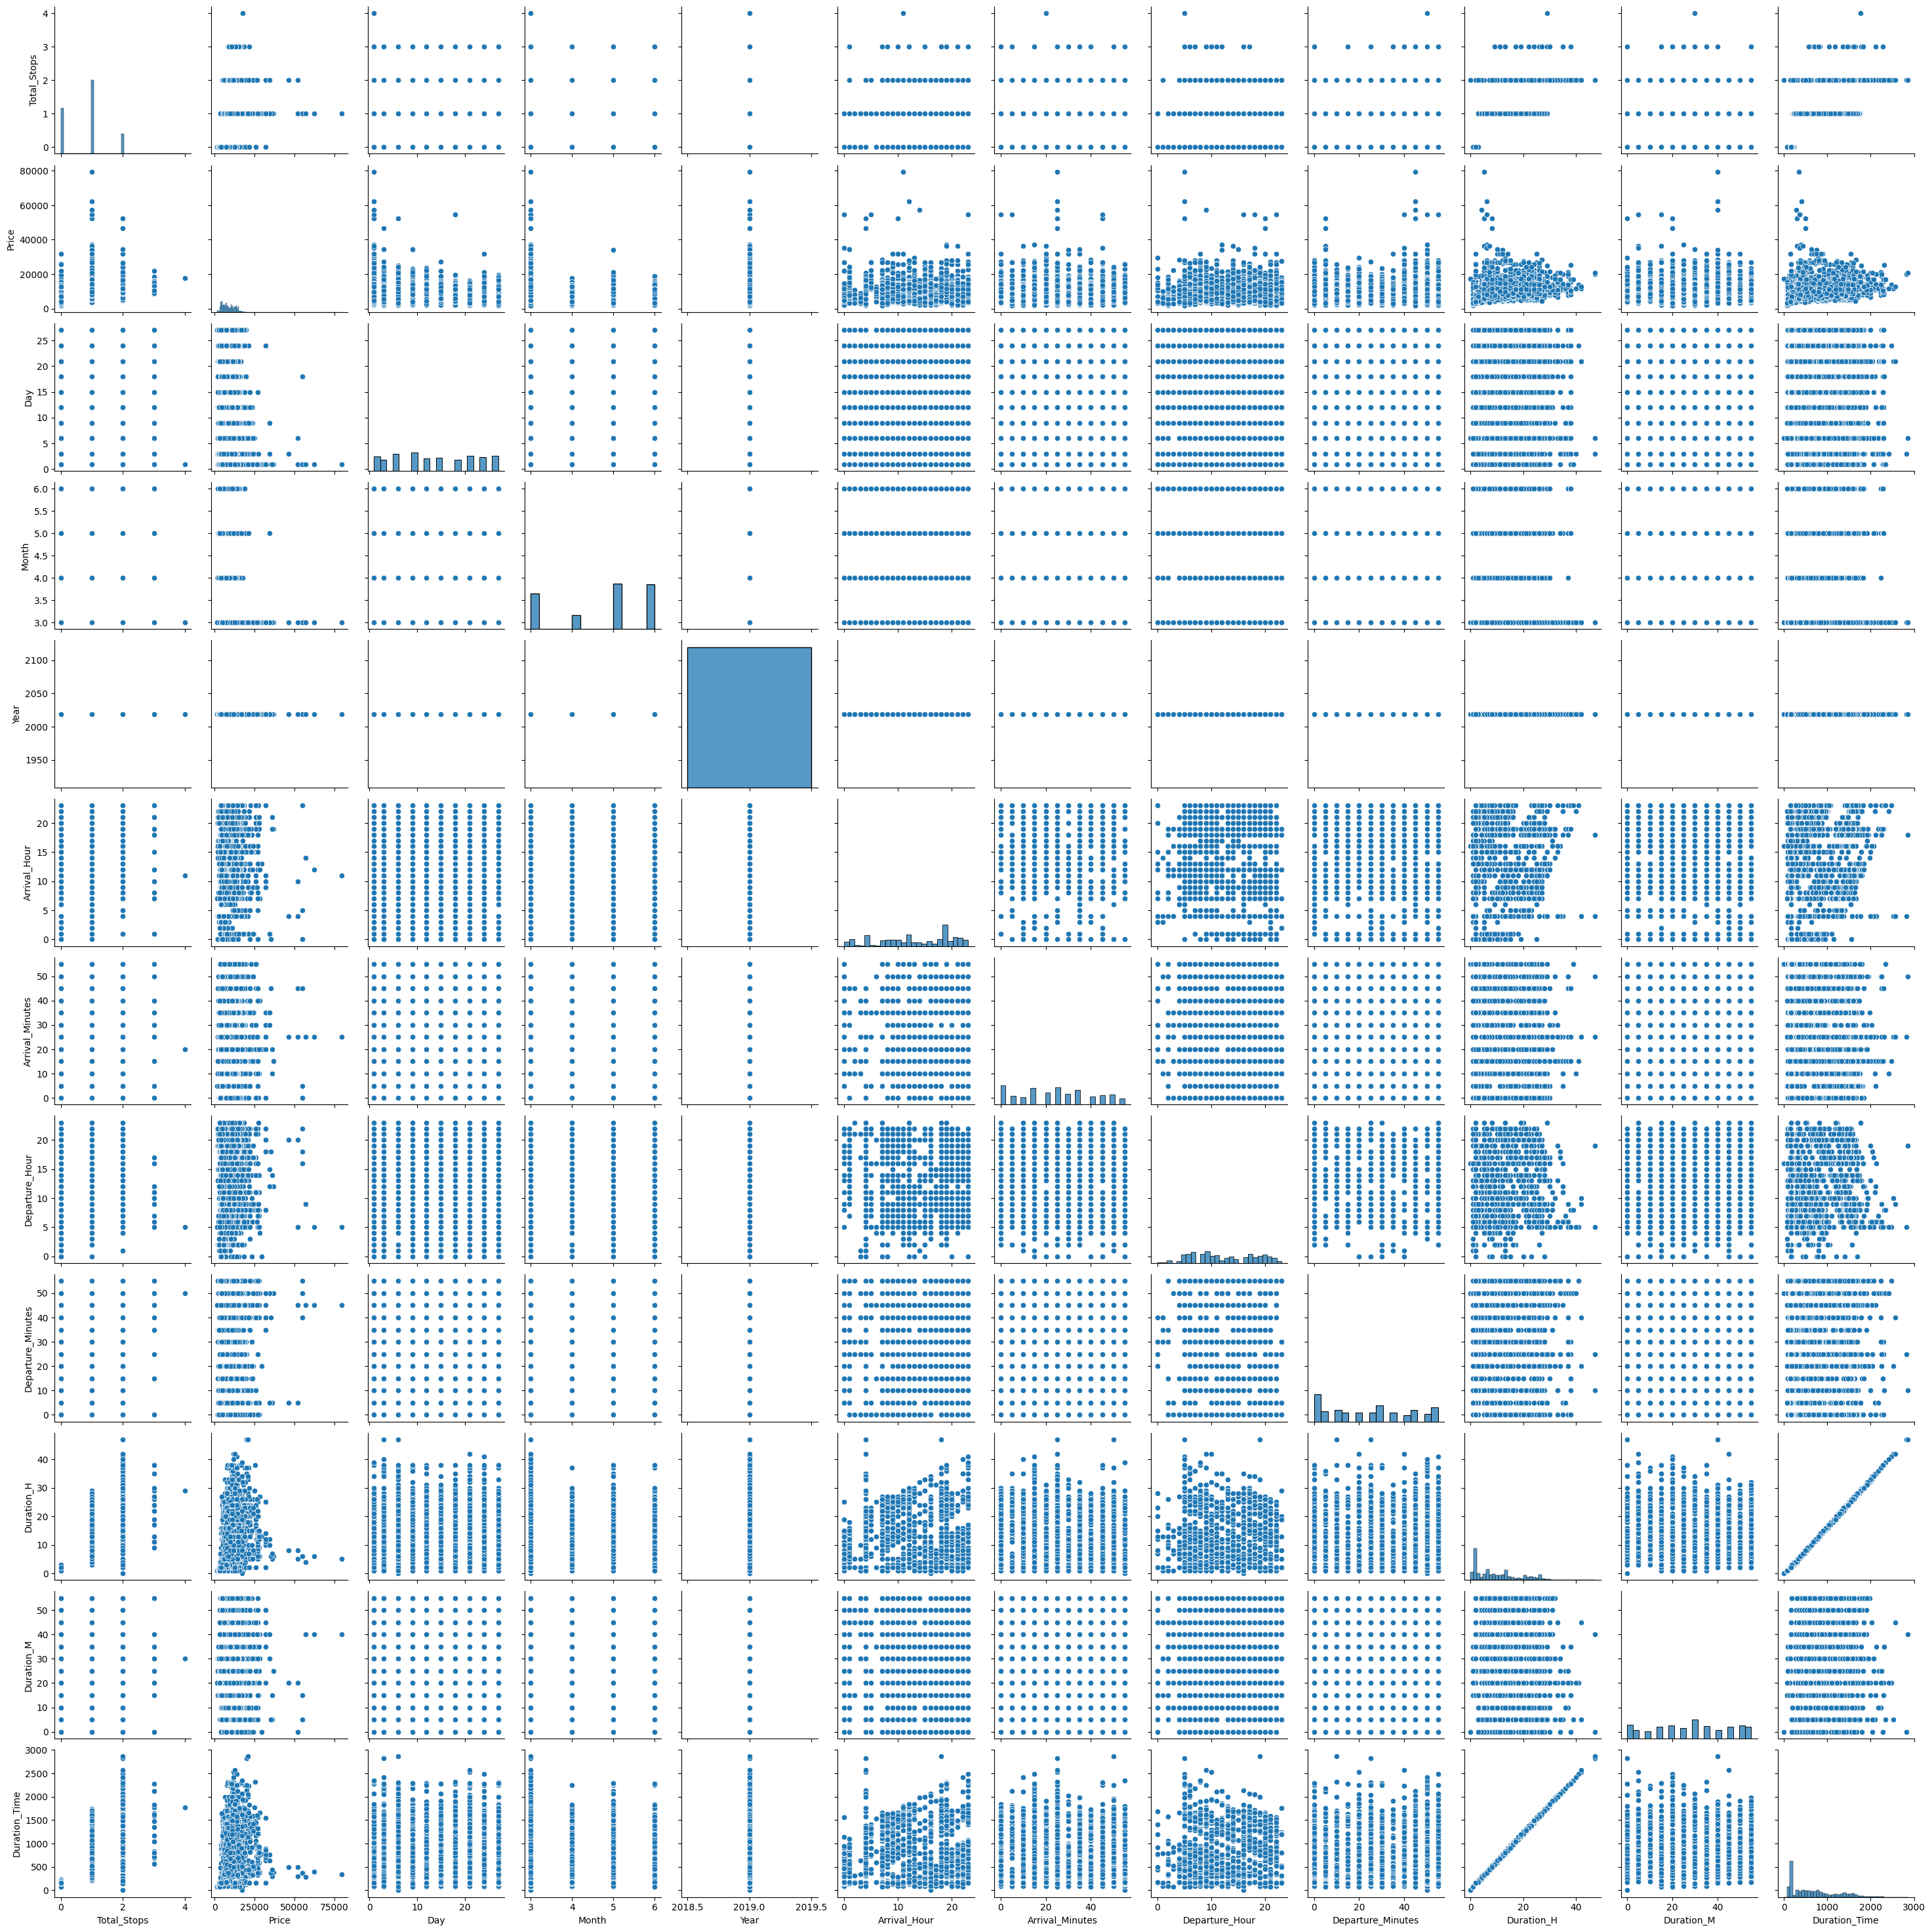

In [96]:
sns.pairplot(df)